In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("seaborn")

In [2]:
ts_data = pd.read_csv("ConstructionTimeSeriesDataV2.csv")

In [3]:
ts_data

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,Jan-02,59516,45273,14243
1,2,Feb-02,58588,44475,14113
2,3,Mar-02,63782,49396,14386
3,4,Apr-02,69504,53283,16221
4,5,May-02,73384,55009,18375
...,...,...,...,...,...
141,142,Oct-13,85193,59370,25823
142,143,Nov-13,77931,55191,22741
143,144,Dec-13,71502,52132,19369
144,145,Jan-14,64661,47827,16834


In [4]:
date_data = {'Jan' : ('01', '31'), 'Feb' : ('02', '28'), 'Mar' : ('03', '31'), 'Apr' : ('04', '30'), 'May' : ('05', '31'), 'Jun' : ('06', '30'), 'Jul' : ('07', '31'), 'Aug' : ('08', '31'), 'Sep' : ('09', '30'), 'Oct' : ('10', '31'), 'Nov' : ('11', '30'), 'Dec' : ('12', '31')}

def to_data_range(date_str):
    return '20' + date_str[-2:] + '-' + date_data[date_str[:3]][0] + '-' + date_data[date_str[:3]][0]

In [5]:
ts_data['Date'] = ts_data['Month-Year'].apply(to_data_range)

In [6]:
ts_data

,Month,Month-Year,Total Construction,Private Construction,Public Construction,Date
0,1,Jan-02,59516,45273,14243,2002-01-01
1,2,Feb-02,58588,44475,14113,2002-02-02
2,3,Mar-02,63782,49396,14386,2002-03-03
3,4,Apr-02,69504,53283,16221,2002-04-04
4,5,May-02,73384,55009,18375,2002-05-05
...,...,...,...,...,...,...
141,142,Oct-13,85193,59370,25823,2013-10-10
142,143,Nov-13,77931,55191,22741,2013-11-11
143,144,Dec-13,71502,52132,19369,2013-12-12
144,145,Jan-14,64661,47827,16834,2014-01-01


In [7]:
ts_data.index = pd.date_range(start=ts_data['Date'].iloc[0], periods = ts_data['Date'].shape[0], freq='M')

In [8]:
ts_data

,Month,Month-Year,Total Construction,Private Construction,Public Construction,Date
2002-01-31,1,Jan-02,59516,45273,14243,2002-01-01
2002-02-28,2,Feb-02,58588,44475,14113,2002-02-02
2002-03-31,3,Mar-02,63782,49396,14386,2002-03-03
2002-04-30,4,Apr-02,69504,53283,16221,2002-04-04
2002-05-31,5,May-02,73384,55009,18375,2002-05-05
...,...,...,...,...,...,...
2013-10-31,142,Oct-13,85193,59370,25823,2013-10-10
2013-11-30,143,Nov-13,77931,55191,22741,2013-11-11
2013-12-31,144,Dec-13,71502,52132,19369,2013-12-12
2014-01-31,145,Jan-14,64661,47827,16834,2014-01-01


## M3 Graphing Assignment ##

The feature I most wanted to accentuate about this data is the seasonal cycle that the data most obviously displays. From the point when I initially plotted this data, I could see the "Sharks Teeth". That is, the data very clearly exhibited a strong seasonal influence.

For example:

<AxesSubplot:title={'center':'Private Construction by month, 2002'}, xlabel='Month', ylabel='Private Construction'>

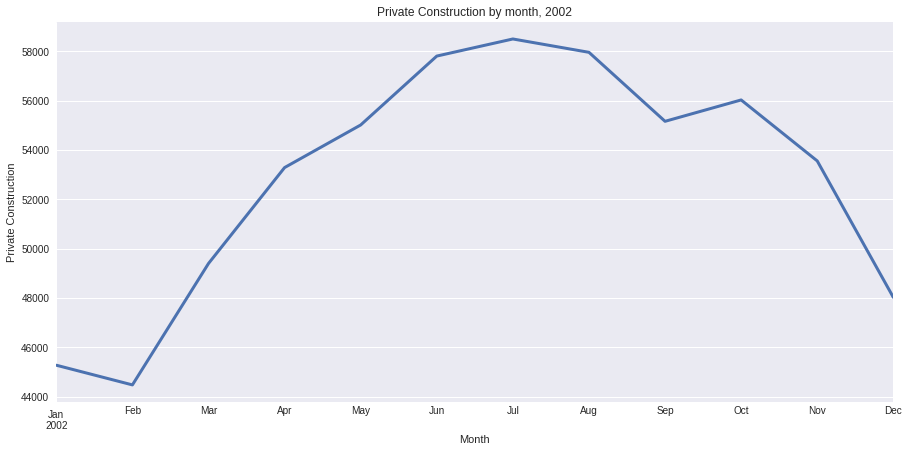

In [11]:
ts_data['Private Construction'][:12].plot(linewidth=3, figsize=(15, 7), xlabel="Month", ylabel="Private Construction", title="Private Construction by month, 2002" )

<AxesSubplot:title={'center':'Public Construction by Month, 2002'}, xlabel='Month', ylabel='Public Construction'>

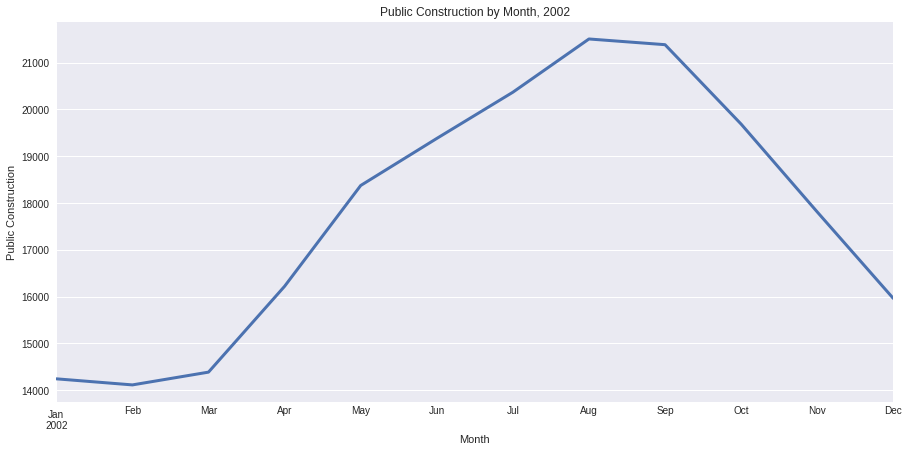

In [12]:
ts_data['Public Construction'][:12].plot(linewidth=3, figsize=(15, 7), xlabel="Month", ylabel="Public Construction", title="Public Construction by Month, 2002" )

The reason why I wanted to highlight this subsection of the graph is because of the seasonal trend in the data and its overall effect on the model. The trend is so strong in the data, with ramp up happening around late February/early March and ramp down beginning in November and December, that the trend is most of the pattern which is being described by the model. In short, this is a repetitive pattern in the data which directly influences the model result. 